In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from sklearn import datasets

In [3]:
# Load in csv for movies
cleaned_movie = pd.read_csv("Resources/movie_df.csv")
del cleaned_movie["Unnamed: 0"]
cleaned_movie.head()

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Robert De Niro,Travis Bickle,ACTOR,1976,0.0,8.2,808582.0,['US']
1,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Jodie Foster,Iris Steensma,ACTOR,1976,0.0,8.2,808582.0,['US']
2,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Albert Brooks,Tom,ACTOR,1976,0.0,8.2,808582.0,['US']
3,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,1976,0.0,8.2,808582.0,['US']
4,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Cybill Shepherd,Betsy,ACTOR,1976,0.0,8.2,808582.0,['US']


In [4]:
# Drop unneccessary columns and drop any rows so that there is 1/movie for later analysis
filtered_movie = cleaned_movie[["id", "Netflix", "Hulu", "HBO", "title", "age_certification", "runtime", "genres",\
                          "release_year", "imdb_score", "imdb_votes", "production_countries"]]
filtered_movie = filtered_movie.drop_duplicates()

In [5]:
# Filter data to only show the director(s) for each movie using the cleaned_movie df 
filtered_director = cleaned_movie[cleaned_movie["role"]=="DIRECTOR"]
filtered_director.head()

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
36,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Martin Scorsese,--,DIRECTOR,1976,0.0,8.2,808582.0,['US']
59,tm154986,1.0,0.0,0.0,Deliverance,MOVIE,R,109,"['drama', 'action', 'thriller', 'european']",John Boorman,--,DIRECTOR,1972,0.0,7.7,107673.0,['US']
106,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,"['fantasy', 'action', 'comedy']",Terry Jones,--,DIRECTOR,1975,0.0,8.2,534486.0,['GB']
107,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,"['fantasy', 'action', 'comedy']",Terry Gilliam,--,DIRECTOR,1975,0.0,8.2,534486.0,['GB']
162,tm120801,1.0,0.0,0.0,The Dirty Dozen,MOVIE,NaN,150,"['war', 'action']",Robert Aldrich,--,DIRECTOR,1967,0.0,7.7,72662.0,"['GB', 'US']"


In [6]:
# Groupby director and calculate the mean IMDb score for each director
grouped_director = filtered_director.groupby("name")
mean_score = grouped_director.mean().reset_index()
mean_score = mean_score[["name", "imdb_score"]]
mean_score.head()

,name,imdb_score
0,A.R. Murugadoss,7.00
1,Aamir Khan,8.30
2,Aaron Horvath,6.70
3,Aaron Moorhead,6.70
4,Aaron Sorkin,7.55


In [7]:
# Use the same groupby object to count the number of movies each director has
num_movie = grouped_director.count().reset_index()
num_movie = num_movie[["name", "title"]]
num_movie.head()

,name,title
0,A.R. Murugadoss,1
1,Aamir Khan,1
2,Aaron Horvath,1
3,Aaron Moorhead,1
4,Aaron Sorkin,2


In [8]:
# Merge the two dfs together and then filter out directors that have made less than 4 films
merged_director = pd.merge(num_movie, mean_score, how="outer", on=["name"])
merged_director = merged_director[merged_director["title"]>3]
merged_director = merged_director[["name", "imdb_score"]] # Remove title column as it is no longer needed
# Sort by IMDb score to find out which director has the highest average
merged_director.sort_values("imdb_score", ascending=False).head()

,name,imdb_score
19,Akira Kurosawa,8.275000
159,Charlie Chaplin,8.225000
180,Christopher Nolan,8.180000
692,Peter Jackson,8.114286
836,Stanley Kubrick,8.100000


Akira Kurosawa has the highest IMDb score average for directors.
The highest IMDb score average is: 8.274999999999999


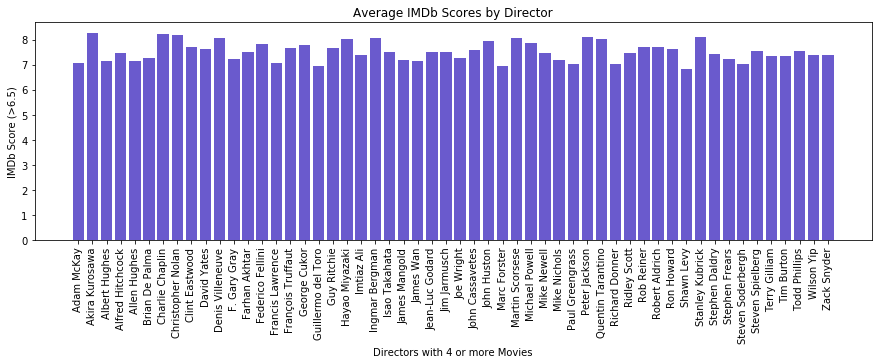

In [9]:
# Generate a bar graph showing all director's with more than 4 movies with their IMDb averages
plt.figure(figsize=(15,4))
plt.bar(merged_director["name"], merged_director["imdb_score"], color='slateblue')
plt.xticks(rotation="vertical")
plt.title("Average IMDb Scores by Director")
plt.xlabel("Directors with 4 or more Movies")
plt.ylabel("IMDb Score (>6.5)")
print("Akira Kurosawa has the highest IMDb score average for directors.")
print(f"The highest IMDb score average is: {merged_director.max(numeric_only=True).max()}")
plt.show()

In [10]:
# Generate a bar graph for the director with the highest average (Akira Kurosawa) to display which movies to watch next
akira_df = cleaned_movie[cleaned_movie["name"]=="Akira Kurosawa"]
akira_df

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
22767,tm58806,0.0,0.0,1.0,Rashomon,MOVIE,NaN,88,"['drama', 'crime']",Akira Kurosawa,--,DIRECTOR,1950,0.0,8.2,165278.0,['JP']
25274,tm18043,0.0,0.0,1.0,Seven Samurai,MOVIE,NaN,207,"['drama', 'action']",Akira Kurosawa,--,DIRECTOR,1954,0.0,8.6,338570.0,['JP']
25909,tm32149,0.0,0.0,1.0,High and Low,MOVIE,NaN,143,"['thriller', 'crime', 'drama']",Akira Kurosawa,--,DIRECTOR,1963,0.0,8.4,42634.0,['JP']
26077,tm41864,0.0,0.0,1.0,Yojimbo,MOVIE,NaN,110,"['thriller', 'crime', 'comedy', 'action', 'dra...",Akira Kurosawa,--,DIRECTOR,1961,0.0,8.2,120681.0,['JP']
27122,tm65430,0.0,0.0,1.0,Ikiru,MOVIE,NaN,143,['drama'],Akira Kurosawa,--,DIRECTOR,1952,0.0,8.3,76619.0,['JP']
27189,tm119925,0.0,0.0,1.0,Throne of Blood,MOVIE,NaN,108,"['drama', 'history']",Akira Kurosawa,--,DIRECTOR,1957,0.0,8.1,51378.0,['JP']
27362,tm81379,0.0,0.0,1.0,Red Beard,MOVIE,NaN,185,['drama'],Akira Kurosawa,--,DIRECTOR,1965,0.0,8.3,18849.0,['JP']
27865,tm127957,0.0,0.0,1.0,The Hidden Fortress,MOVIE,NaN,139,"['comedy', 'drama', 'action']",Akira Kurosawa,--,DIRECTOR,1958,0.0,8.1,38445.0,['JP']


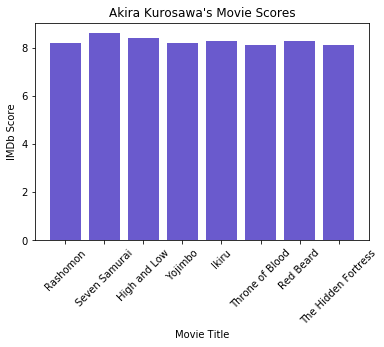

Seven Samurai is Akira Kurasawa's highest scoring film.


In [12]:
# Generate a bar graph for the director with the highest average (Akira Kurosawa) to display which movies to watch next
plt.bar(akira_df["title"], akira_df["imdb_score"], color = "slateblue")
plt.xticks(rotation=45)
plt.title("Akira Kurosawa's Movie Scores")
plt.xlabel("Movie Title")
plt.ylabel("IMDb Score")
plt.show()
print("Seven Samurai is Akira Kurasawa's highest scoring film.")

In [167]:
# Sort the df to show the longest running movies first (to know scatter plot limits)
filtered_movie.sort_values("runtime", ascending=False).head()

,id,Netflix,Hulu,HBO,title,age_certification,runtime,genres,release_year,imdb_score,imdb_votes,production_countries
48455,tm893885,0.0,0.0,1.0,Zack Snyder's Justice League,R,242,"['fantasy', 'scifi', 'action', 'drama']",2021,8.0,376734.0,['US']
22535,tm156463,0.0,0.0,1.0,Gone with the Wind,G,233,"['war', 'romance', 'drama', 'history']",1939,8.2,309856.0,['US']
15446,tm180542,0.0,1.0,0.0,Once Upon a Time in America,R,229,"['drama', 'crime', 'european']",1984,8.3,342335.0,"['US', 'IT']"
4253,tm43399,1.0,0.0,0.0,Lagaan: Once Upon a Time in India,PG,224,"['romance', 'drama', 'action', 'sport']",2001,8.1,111053.0,['IN']
39090,tm115982,0.0,0.0,1.0,The Lord of the Rings: The Two Towers,PG-13,223,"['fantasy', 'action', 'drama']",2002,8.8,1604677.0,"['NZ', 'US']"


The value of r is: 0.2499884076945183


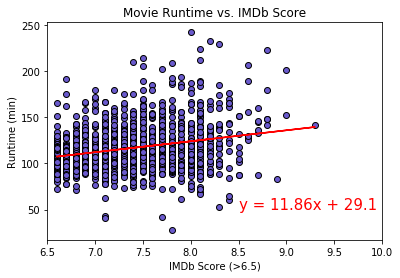

In [168]:
# Create a scatter plot to compare the runtime of movies with their IMDb score
y_axis = filtered_movie["runtime"]
x_axis = filtered_movie["imdb_score"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="slateblue", edgecolors="black")
plt.xlim(6.5, 10)
plt.title("Movie Runtime vs. IMDb Score")
plt.ylabel("Runtime (min)")
plt.xlabel("IMDb Score (>6.5)")
# Calculate the linear regression and it on the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(8.5,50),fontsize=15,color="red")
print(f"The value of r is: {rvalue}")
plt.show()

There is no correlation between the length of a movie and it's IMDb score.

In [32]:
# Load in csv for tv shows
cleaned_tv = pd.read_csv("Resources/show_df.csv")
del cleaned_tv["Unnamed: 0"]
cleaned_tv.head()

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Graham Chapman,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
1,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Michael Palin,"Various / ""It's"" man",ACTOR,1969,4.0,8.8,73424.0,['GB']
2,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Terry Jones,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
3,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Eric Idle,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
4,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Terry Gilliam,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']


In [33]:
# Include only necessary columns and drop additional lines so only one row per show is displayed
filtered_tv = cleaned_tv[["id", "Netflix", "Hulu", "HBO", "title", "age_certification", "runtime", "genres",\
                          "release_year", "seasons", "imdb_score", "imdb_votes", "production_countries"]]
filtered_tv = filtered_tv.drop_duplicates()

In [34]:
# Sort by seasons to see which shows have the most seasons (to know scatter plot limits)
filtered_tv.sort_values("seasons", ascending=False).head(10)

,id,Netflix,Hulu,HBO,title,age_certification,runtime,genres,release_year,seasons,imdb_score,imdb_votes,production_countries
6252,ts22243,0.0,0.0,1.0,Sesame Street,TV-Y,51,"['family', 'fantasy', 'music', 'animation', 'c...",1969,52.0,8.1,13666.0,['US']
3061,ts20475,0.0,1.0,0.0,Saturday Night Live,TV-14,89,"['music', 'comedy']",1975,47.0,8.0,47910.0,['US']
3214,ts20981,0.0,1.0,0.0,Survivor,TV-PG,48,['reality'],2000,42.0,7.4,24368.0,['US']
19,ts20981,1.0,0.0,0.0,Survivor,TV-PG,48,['reality'],2000,42.0,7.4,24687.0,['US']
3118,ts20711,0.0,1.0,0.0,The Simpsons,TV-14,27,"['animation', 'comedy']",1989,34.0,8.7,394764.0,['US']
3609,ts5716,0.0,1.0,0.0,The Amazing Race,TV-PG,48,"['reality', 'family', 'action']",2001,33.0,7.8,14394.0,['US']
88,ts20371,1.0,0.0,0.0,Top Gear,TV-PG,58,"['comedy', 'reality', 'european', 'music']",2002,32.0,8.7,117240.0,['GB']
6528,ts20371,0.0,0.0,1.0,Top Gear,TV-PG,58,"['comedy', 'reality', 'european', 'music']",2002,31.0,8.7,115974.0,['GB']
6310,ts21792,0.0,0.0,1.0,South Park,TV-MA,22,"['comedy', 'animation']",1997,25.0,8.7,359621.0,['US']
3270,ts20386,0.0,1.0,0.0,Law & Order: Special Victims Unit,TV-14,46,"['crime', 'drama', 'thriller']",1999,24.0,8.1,100328.0,['US']


The value of r is: 0.10076790030232992


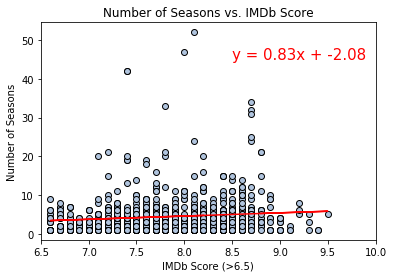

In [50]:
# Create a scatter plot to compare the number of seasons for TV shows with their IMDb score
y_axis = filtered_tv["seasons"]
x_axis = filtered_tv["imdb_score"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.xlim(6.5, 10)
plt.title("Number of Seasons vs. IMDb Score")
plt.ylabel("Number of Seasons")
plt.xlabel("IMDb Score (>6.5)")
# Calculate the linear regression and it on the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(8.5,45),fontsize=15,color="red")
print(f"The value of r is: {rvalue}")
plt.show()

There is no correlation between number of seasons a TV show has and it's IMDb score.